### Medicare

#### Medicare is the USA federal government program that provides health care coverage (health insurance) 

* If you are 65+ 
* Under 65 and receiving Social Security Disability Insurance (SSDI) for a certain amount of time
* Under 65 and with End-Stage Renal Disease (ESRD).

#### Who funds  Medicare ?
* The US Hospital Insurance (HI) Trust Fund
* Supplementary Medical Insurance (SMI) Trust Fund

#### What does Medicare pay for?
* Medicare Part A (Hospital Insurance)   benefits , 
    * like inpatient hospital care
    * skilled nursing facility (snf) care 
    * home health care 
    * hospice care
* Medicare Part B like benefits cover certain non-hospital medical expenses like doctors’ office visits,
  * blood test
  * X-rays
  * diabetic screenings and supplies
  * outpatient hospital care.
* Medicare Part D for precription drugs

#### Data Source
* https://data.medicare.gov/

#### Data

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
medicare = pd.read_csv('Medicare Hospital Spending by Claim.csv')

In [78]:
medicare.head()

,Facility Name,Facility ID,State,Period,Claim Type,Avg Spndg Per EP Hospital,Avg Spndg Per EP State,Avg Spndg Per EP National,Percent of Spndg Hospital,Percent of Spndg State,Percent of Spndg National,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,Prior Hospital Admission,Home Health Agency,21,16,13,0.09,0.08,0.06,01/01/2018,12/31/2018
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,Prior Hospital Admission,Hospice,2,1,1,0.01,0.00,0.00,01/01/2018,12/31/2018
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,Prior Hospital Admission,Inpatient,6,7,7,0.03,0.04,0.03,01/01/2018,12/31/2018
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,Prior Hospital Admission,Outpatient,219,108,152,0.95,0.52,0.70,01/01/2018,12/31/2018
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,Prior Hospital Admission,Skilled Nursing Facility,1,2,2,0.00,0.01,0.01,01/01/2018,12/31/2018


#### Problem Statement Created by looking at the data
* How much is spent over Inpatient and Outpatient services by the state , nation and hospital
* Statewise spending done on Nursing facility
* Analysis of spending done for medical facilities
* For which period is the spending done more 
* Comparison of spending done for Inpatient VS Spending for Outpatient
* Grouping the spending into buckets which will tell us which medical facility belongs to which bucket (need to look into it)

These problem statements can help Medicare people to get an idea about how the spending is happening

#### Data description

In [38]:
medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67826 entries, 0 to 67825
Data columns (total 13 columns):
Facility Name                67826 non-null object
Facility ID                  67826 non-null int64
State                        67826 non-null object
Period                       67826 non-null object
Claim Type                   67826 non-null object
Avg Spndg Per EP Hospital    67826 non-null int64
Avg Spndg Per EP State       67826 non-null int64
Avg Spndg Per EP National    67826 non-null int64
Percent of Spndg Hospital    67826 non-null float64
Percent of Spndg State       67826 non-null float64
Percent of Spndg National    67826 non-null float64
Start Date                   67826 non-null object
End Date                     67826 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 6.7+ MB


In [33]:
medicare.describe()

,Facility ID,Avg Spndg Per EP Hospital,Avg Spndg Per EP State,Avg Spndg Per EP National
count,67826.000000,67826.000000,67826.000000,67826.000000
mean,260615.397665,1823.576682,1970.594448,1967.909091
std,161163.032969,4571.752066,4833.027866,4816.227247
min,10001.000000,0.000000,0.000000,0.000000
25%,110076.000000,0.000000,2.000000,2.000000
50%,250104.000000,68.000000,98.000000,119.000000
75%,390117.000000,1012.000000,1174.000000,1174.000000
max,670122.000000,41637.000000,23343.000000,21646.000000


##### There are no null values

#### What are the different claim periods  that we have in our data?

In [34]:
medicare['Period'].value_counts()

1 through 30 days After Discharge from Index Hospital Admission    21581
During Index Hospital Admission                                    21581
1 to 3 days Prior to Index Hospital Admission                      21581
Complete Episode                                                    3083
Name: Period, dtype: int64

#### Let's give the claim periods some easy names

In [35]:
def changing_period_names(previous_name):
    if previous_name == '1 through 30 days After Discharge from Index Hospital Admission':
        return 'After Discharge'
    elif previous_name == 'During Index Hospital Admission':
        return 'During Hospital Admission'
    elif previous_name =='1 to 3 days Prior to Index Hospital Admission':
        return 'Prior Hospital Admission'
    elif previous_name == 'Complete Episode':
        return 'Overall'
    
medicare['Period'] = medicare['Period'].map(changing_period_names)

In [8]:
medicare['Period'].value_counts()

Prior Hospital Admission     21581
After Discharge              21581
During Hospital Admission    21581
Overall                       3083
Name: Period, dtype: int64

#### What kind of claims do we have for medicare?

In [9]:
medicare['Claim Type'].value_counts()

Hospice                      9249
Skilled Nursing Facility     9249
Outpatient                   9249
Durable Medical Equipment    9249
Carrier                      9249
Home Health Agency           9249
Inpatient                    9249
Total                        3083
Name: Claim Type, dtype: int64

#### Excatly how many Facilty centers are we having in our data for medicare

In [10]:
medicare['Facility ID'].nunique()

3083

#### Percent spnding hospital, Percent of Spndg State, Percent of Spndg National should be in a numerical format

In [36]:
import re
#Removing the % symbol
medicare['Percent of Spndg Hospital'] = medicare['Percent of Spndg Hospital'].apply(lambda x: re.sub('%', '', x))
medicare['Percent of Spndg State'] = medicare['Percent of Spndg State'].apply(lambda x: re.sub('%', '', x))
medicare['Percent of Spndg National'] = medicare['Percent of Spndg National'].apply(lambda x: re.sub('%', '', x))

In [37]:
#Converting into float
medicare['Percent of Spndg Hospital'] = medicare['Percent of Spndg Hospital'].apply(lambda x: float(x))
medicare['Percent of Spndg State'] = medicare['Percent of Spndg State'].apply(lambda x: float(x))
medicare['Percent of Spndg National'] = medicare['Percent of Spndg National'].apply(lambda x: float(x))

In [ ]:
south_alabama = medicare[(medicare['Facility Name'] == 'SOUTHEAST ALABAMA MEDICAL CENTER') &(medicare['Claim Type'] != 'Total')]

#### State wise cost for Avg Spndg Per EP Hospital for all the claim types

In [87]:
#Since we are looking for all claim types, the claim type will be total
total = medicare[(medicare['Claim Type'] == 'Total')]

In [88]:
#We are dropping the start date and end date as we dont need it.
total.drop(columns = ['Start Date','End Date'], inplace = True)

In [152]:
#The total number of states that we have
total['State'].nunique()

50

In [137]:
All_States = total['State'].unique()

In [154]:
#These are all the states
print(All_States)

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [323]:
def data_avg_spend_hospital_statewise(df):
    avg_per_hospital = [] #Captures sum of the avg spending for EACH state e.g for AL = 12000 for AK = 12333
    
    total_avg_spend_hospital = df.agg({'Avg Spndg Per EP Hospital':sum})#Captures sum of the avg spending for ALL state
   
    all_states = df['State'].unique()
    
    for i in all_states:
        avg_per_hospital.append(df[(df['State'] == i)].agg({'Avg Spndg Per EP Hospital':sum})[0])
    
    new_dataframe = pd.DataFrame(list(zip(all_states, avg_per_hospital )),columns  = ['State','Spending'],index = [all_states])
    return new_dataframe
    

In [324]:
Statewise_Hosital_spending = data_avg_spend_hospital_statewise(total)

#### Lets see the top 10 states where hospital wise spending is more

In [335]:
top_ten_spending = Statewise_Hosital_spending.Spending.sort_values(ascending=False)[:10]

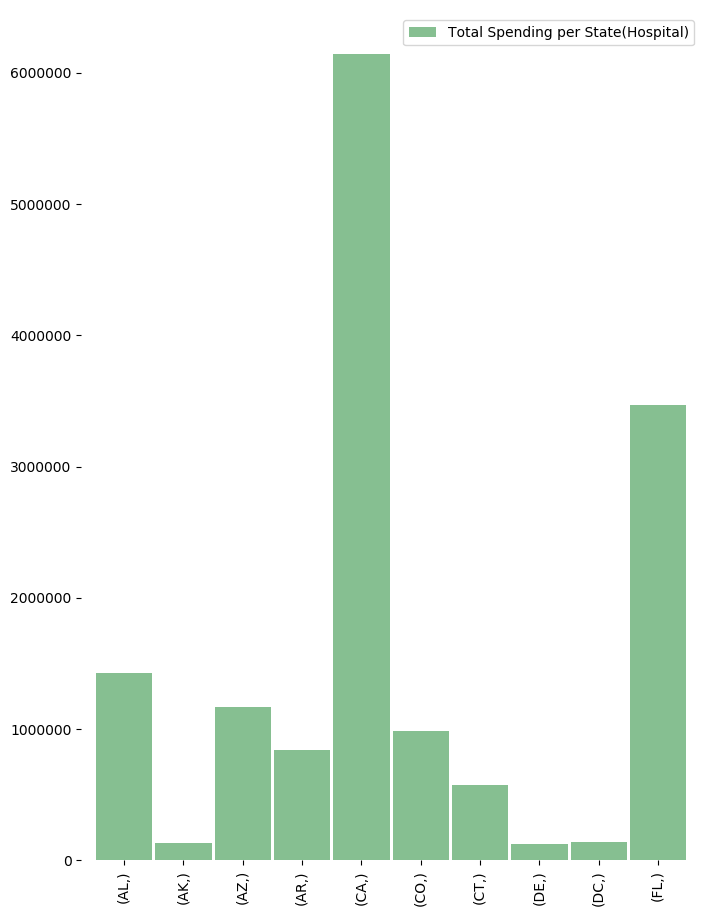

In [320]:
#Avg_Per_EP_Hospital_Spending.plot(kind='barh')
ax = Avg_Per_EP_Hospital_Spending['Total'].plot(kind='bar',color ='#86bf91', figsize=(8, 11), zorder=2, width=0.95)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [ ]:
all